## 对温度分布频数进行统计 Calculate Frequency （热）

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [101]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0][-1]=='3':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

# print(file_list)  

df = pd.DataFrame()

for index, csv in enumerate(file_list):
    
    df_temp = pd.read_csv('./raw_data/'+csv)
    if int(csv[-5]) == 0:
        file_list[index] = csv[:-5] + '1' +csv[-4:]
        print('changed csv: ', csv)
    target_column = pd.DataFrame(np.array([int(file_list[index][-5])]*df_temp.shape[0]))
    # 构造target列，注意要使用二维的array [[1],[1]]这样是列 [[1,1]]这样是行
    df_temp = pd.concat([df_temp, target_column], axis=1, ignore_index=True)
    # 连接样本和target列
    df = pd.concat([df, df_temp], ignore_index=True)
    # 连接所有样本
    
print(file_list)

['data_20190309_1008_3.csv', 'data_20190309_1334_3.csv', 'data_20190309_1336_3.csv']


In [112]:
target_column = df.iloc[:, -1]
df = df.iloc[:, :-1]

# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
# df_face 脸部温度+其他区域温度置换为环境温度
df_onlyface = pd.DataFrame()
# df_onlyface 只有脸部温度点

for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 4:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
        except:
            j = float(j[:6])
            if j - minTa > 4:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [113]:
# 排除掉脸部温度点小于400和大于500的样本
df_onlyface = df_onlyface[df_onlyface.count(axis=1)>400]
df_onlyface = df_onlyface[df_onlyface.count(axis=1)<500]

In [114]:
# 分成24个区间
N, bins = np.histogram(df_onlyface.iloc[0].dropna(), 25)

In [115]:
# 这个分割点会一直用它！
print('区间频数:', N)
print('分割点：', bins)

区间频数: [17 17 14 11  7  5  9 11  6 10  4  7 11 10 11 19 22 34 46 49 68 46 45 12
  7]
分割点： [30.01602   30.2923396 30.5686592 30.8449788 31.1212984 31.397618
 31.6739376 31.9502572 32.2265768 32.5028964 32.779216  33.0555356
 33.3318552 33.6081748 33.8844944 34.160814  34.4371336 34.7134532
 34.9897728 35.2660924 35.542412  35.8187316 36.0950512 36.3713708
 36.6476904 36.92401  ]


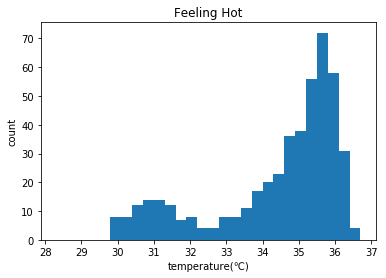

In [116]:
bins=[28.3, 28.6, 28.9, 29.2, 29.5,
 29.8, 30.1, 30.4, 30.7, 31.0,  31.3,
 31.6, 31.9, 32.2, 32.5,  32.8, 33.1,
 33.4, 33.7, 34.0,  34.3, 34.6, 34.9,
 35.2, 35.5, 35.8, 36.1, 36.4, 36.7]
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
N, bins, patches = ax0.hist(np.array(df_onlyface.iloc[3].dropna()), bins=bins) # 使用相同的分割点
ax0.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('temperature(℃)')
plt.ylabel('count')
plt.title('Feeling Hot')
plt.savefig("I:\graduation\论文\images\hot.png", dpi=150)
plt.show()

In [169]:
temDistribution = pd.DataFrame()
for i in df_onlyface.values:
    i = [j for j in i if not np.isnan(j)]
    N, _ = np.histogram(i, bins=bins)
    N_todf = pd.DataFrame(N).T
    temDistribution = pd.concat([temDistribution, N_todf])

In [206]:
temDistribution.index = [i for i in range(temDistribution.shape[0])]
temDistribution.columns = ["p{}".format(i) for i in range(temDistribution.shape[1])]
temDistribution

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
0,2,11,6,3,5,4,8,7,10,3,...,12,16,19,28,44,58,61,59,51,21
1,13,3,3,6,5,4,3,4,2,4,...,15,30,21,28,57,66,58,62,44,16
2,6,5,4,4,6,5,5,6,3,4,...,18,18,20,34,60,63,63,51,36,12
3,4,7,4,4,8,6,3,7,8,3,...,6,15,21,26,53,54,46,51,42,14
4,7,7,5,8,7,3,3,10,8,9,...,12,17,28,37,43,58,55,35,28,7
5,4,7,4,3,0,6,5,7,9,4,...,14,24,21,33,57,50,50,58,31,9
6,9,0,2,1,1,3,5,5,8,6,...,12,20,26,34,40,57,72,58,28,10
7,4,2,4,4,4,0,1,5,4,5,...,22,18,23,34,46,50,77,50,28,6
8,4,4,3,3,2,2,4,4,3,11,...,14,21,12,33,36,47,69,59,46,15
9,6,3,4,3,4,3,4,8,5,5,...,15,22,26,29,45,60,67,59,29,8


# 舒适

In [83]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0][-1]=='2':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

# print(file_list)  

df = pd.DataFrame()

for index, csv in enumerate(file_list):
    
    df_temp = pd.read_csv('./raw_data/'+csv)
    if int(csv[-5]) == 0:
        file_list[index] = csv[:-5] + '1' +csv[-4:]
        print('changed csv: ', csv)
    target_column = pd.DataFrame(np.array([int(file_list[index][-5])]*df_temp.shape[0]))
    # 构造target列，注意要使用二维的array [[1],[1]]这样是列 [[1,1]]这样是行
    df_temp = pd.concat([df_temp, target_column], axis=1, ignore_index=True)
    # 连接样本和target列
    df = pd.concat([df, df_temp], ignore_index=True)
    # 连接所有样本
    
print(file_list)

['data_20190301_1035_2.csv', 'data_20190309_1342_2.csv', 'data_20190309_1358_2.csv', 'data_20190309_1405_2.csv']


In [84]:
target_column = df.iloc[:, -1]
df = df.iloc[:, :-1]

# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
# df_face 脸部温度+其他区域温度置换为环境温度
df_onlyface = pd.DataFrame()
# df_onlyface 只有脸部温度点

for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
        except:
            j = float(j[:6])
            if j - minTa > 7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [85]:
# 排除掉脸部温度点小于400和大于500的样本
df_onlyface = df_onlyface[df_onlyface.count(axis=1)>400]
df_onlyface = df_onlyface[df_onlyface.count(axis=1)<500]

In [86]:
# 分成24个区间
N, bins = np.histogram(df_onlyface.iloc[5].dropna(), 25)

In [87]:
# 这个分割点会一直用它！
print('区间频数:', N)
print('分割点：', bins)

区间频数: [ 5  5  6  4  3  1  6  7  9  8  2 11  6 11  9 17 27 31 39 69 50 59 41 12
  4]
分割点： [27.91315  28.217658 28.522166 28.826674 29.131182 29.43569  29.740198
 30.044706 30.349214 30.653722 30.95823  31.262738 31.567246 31.871754
 32.176262 32.48077  32.785278 33.089786 33.394294 33.698802 34.00331
 34.307818 34.612326 34.916834 35.221342 35.52585 ]


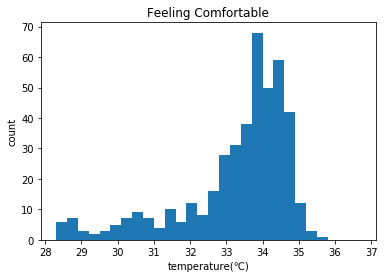

In [88]:
bins=[28.3, 28.6, 28.9, 29.2, 29.5,
 29.8, 30.1, 30.4, 30.7, 31.0,  31.3,
 31.6, 31.9, 32.2, 32.5,  32.8, 33.1,
 33.4, 33.7, 34.0,  34.3, 34.6, 34.9,
 35.2, 35.5, 35.8, 36.1, 36.4, 36.7]
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
N, bins, patches = ax0.hist(np.array(df_onlyface.iloc[5].dropna()), bins=bins) # 使用相同的分割点
ax0.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('temperature(℃)')
plt.ylabel('count')
plt.title('Feeling Comfortable')
plt.savefig("I:\graduation\论文\images\comfortable.png", dpi=150)
plt.show()

# 冷

In [89]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0][-1]=='0':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

# print(file_list)  

df = pd.DataFrame()

for index, csv in enumerate(file_list):
    
    df_temp = pd.read_csv('./raw_data/'+csv)
    if int(csv[-5]) == 0:
        file_list[index] = csv[:-5] + '1' +csv[-4:]
        print('changed csv: ', csv)
    target_column = pd.DataFrame(np.array([int(file_list[index][-5])]*df_temp.shape[0]))
    # 构造target列，注意要使用二维的array [[1],[1]]这样是列 [[1,1]]这样是行
    df_temp = pd.concat([df_temp, target_column], axis=1, ignore_index=True)
    # 连接样本和target列
    df = pd.concat([df, df_temp], ignore_index=True)
    # 连接所有样本
    
print(file_list)

changed csv:  data_20190303_1035_0.csv
['data_20190303_1035_1.csv']


In [90]:
target_column = df.iloc[:, -1]
df = df.iloc[:, :-1]

# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
# df_face 脸部温度+其他区域温度置换为环境温度
df_onlyface = pd.DataFrame()
# df_onlyface 只有脸部温度点

for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
        except:
            j = float(j[:6])
            if j - minTa > 7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [91]:
# 排除掉脸部温度点小于400和大于500的样本
df_onlyface = df_onlyface[df_onlyface.count(axis=1)>400]
df_onlyface = df_onlyface[df_onlyface.count(axis=1)<500]

In [92]:
# 分成24个区间
N, bins = np.histogram(df_onlyface.iloc[5].dropna(), 25)

In [93]:
# 这个分割点会一直用它！
print('区间频数:', N)
print('分割点：', bins)

区间频数: [ 7  8  4  6  3  7  4 12  7 10 15 10 19 16 10 26 40 33 35 43 47 33 20  4
  2]
分割点： [27.44717   27.7262072 28.0052444 28.2842816 28.5633188 28.842356
 29.1213932 29.4004304 29.6794676 29.9585048 30.237542  30.5165792
 30.7956164 31.0746536 31.3536908 31.632728  31.9117652 32.1908024
 32.4698396 32.7488768 33.027914  33.3069512 33.5859884 33.8650256
 34.1440628 34.4231   ]


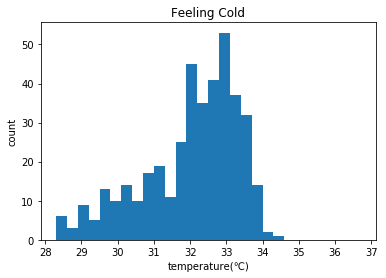

In [94]:
bins=[28.3, 28.6, 28.9, 29.2, 29.5,
 29.8, 30.1, 30.4, 30.7, 31.0,  31.3,
 31.6, 31.9, 32.2, 32.5,  32.8, 33.1,
 33.4, 33.7, 34.0,  34.3, 34.6, 34.9,
 35.2, 35.5, 35.8, 36.1, 36.4, 36.7]
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
N, bins, patches = ax0.hist(np.array(df_onlyface.iloc[5].dropna()), bins=bins) # 使用相同的分割点
ax0.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('temperature(℃)')
plt.ylabel('count')
plt.title('Feeling Cold')
plt.savefig("I:\graduation\论文\images\cold.png", dpi=150)
plt.show()